# Multiprocessing in Python

## What is Parallel Programming?
Parallel programming is a computing technique where multiple tasks or computations are executed simultaneously. This approach significantly improves performance by utilizing multiple processors or cores to perform computations faster than traditional sequential execution.
To parallelize a program, the problem must be broken down into smaller subunits that can run independently (or almost independently) from each other. These subunits can then be assigned to different processors, allowing computations to be performed concurrently.

## Shared Memory vs Distributed Memory

There are two main models for handling data communication in parallel computing:
### A. Shared Memory Model
* All processes or threads share the same memory space.
* No need for explicit communication between processes.
* However, synchronization issues arise when multiple processes modify the same data simultaneously.

## Distributed Memory Model
* Each process has its own separate memory space.
* Communication between processes must be explicitly managed (e.g., using message passing).
* Data can be exchanged over a network, making it slower than shared memory.

# Threads vs Processes

A thread is a lightweight subtask within a process. Threads share memory, which simplifies communication.

Problem: In Python, threads are limited by the Global Interpreter Lock (GIL).

> Why Python Threads Are Limited? Python’s GIL (Global Interpreter Lock) allows only one thread to execute Python instructions at a time. This means:
Even if a program spawns multiple threads, they execute one at a time.
Threads do not achieve true parallelism in CPU-bound tasks.

Unlike threads, each process runs independently with its own memory space.
Processes bypass the GIL, enabling true parallel execution.
Downsides: Processes consume more memory and inter-process communication is slower than thread communication.

In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

## The Process and Pool Classes

You can create a process that runs independently by subclassing
multiprocessing.Process. You can extend the `__init__` method to initialize resources, and you can write the portion of the code that will be executed in a subprocess by implementing the `Process.run` method. In the following code, we define a Process class that will wait for one second and print its assigned id:

In [8]:
%%writefile multiprocessing_test.py
import multiprocessing
import time

class MyProcess(multiprocessing.Process):
    def __init__(self, id):
        super(MyProcess, self).__init__()
        self.id = id

    def run(self):
        time.sleep(1)
        print(f"Process with ID {self.id} executed.")

if __name__ == '__main__':
  p = MyProcess(0)
  p.start()

Writing multiprocessing_test.py


To spawn the process, we have to instantiate the `Process` class and call the `Process.start` method.

In [9]:
!python3 multiprocessing_test.py


Process with ID 0 executed.


The instructions after `Process.start` will be executed immediately without waiting for the p process to finish. To wait for the task completion, you can use the `Process.join` method, as follows:

In [12]:
%%writefile multiprocessing_test.py
import multiprocessing
import time

class MyProcess(multiprocessing.Process):
    def __init__(self, id):
        super(MyProcess, self).__init__()
        self.id = id

    def run(self):
        time.sleep(1)
        print(f"Process with ID {self.id} executed.")

if __name__ == '__main__':
  p = MyProcess(0)
  p.start()
  p.join()

Overwriting multiprocessing_test.py


In [13]:
!python3 multiprocessing_test.py


Process with ID 0 executed.


We can launch four different processes that will run parallely in the same way. In a serial program, the total required time will be four seconds. Since the execution is concurrent, the resulting wallclock time will be of one second. In the following code, we create four processes that will execute concurrently:

In [14]:
%%writefile multiprocessing_test.py
import multiprocessing
import time

class MyProcess(multiprocessing.Process):
    def __init__(self, id):
        super(MyProcess, self).__init__()
        self.id = id

    def run(self):
        time.sleep(1)
        print(f"Process with ID {self.id} executed.")
        
if __name__ == '__main__':
    processes = [MyProcess(i) for i in range(4)]

    for p in processes:
        p.start()

    for p in processes:
        p.join()

Overwriting multiprocessing_test.py


In [16]:
!python3 multiprocessing_test.py

Process with ID 0 executed.
Process with ID 1 executed.
Process with ID 2 executed.
Process with ID 3 executed.


Note that the order of the execution for parallel processes is unpredictable and ultimately depends on how the OS schedules their execution. You can verify this behavior by executing the program multiple times; the order will likely be different between runs.

The `multiprocessing` module exposes a convenient interface that makes it easy to assign and distribute tasks to a set of processes that reside in the `multiprocessing.Pool` class.

The `multiprocessing.Pool` class spawns a set of processes--called workers--and lets us submit tasks through the apply/apply_async and map/map_async methods.
The `Pool.map `method applies a function to each element of a list and returns the list of results. Its usage is equivalent to the built-in (serial) map.

To use a parallel map, you should first initialize a m`ultiprocessing.Pool `object. It takes the number of workers as its first argument; if not provided, that number will be equal to the number of cores in the system. You can initialize a `multiprocessing.Pool` object in the following way:

In [17]:
%%writefile multiprocessing_pool.py
import multiprocessing

def square(n):
    return n * n

if __name__ == '__main__':
    with multiprocessing.Pool(processes=4) as pool:
        numbers = [1, 2, 3, 4, 5]
        results = pool.map(square, numbers)

    print("Results:", results)


Writing multiprocessing_pool.py


In [18]:
!python3 multiprocessing_pool.py


Results: [1, 4, 9, 16, 25]


The `Pool.map_async` function is just like Pool.map but returns an `AsyncResul`t object instead of the actual result. When we call `Pool.map`, the execution of the main program is stopped until all the workers are finished processing the result. With `map_async`, the AsyncResult object is returned immediately without blocking the main program and the calculations are done in the background. We can then retrieve the result using the `AsyncResult.ge`t method at any time, as shown in the following lines:

In [19]:
%%writefile multiprocessing_apply_async.py
import multiprocessing

def cube(n):
    return n ** 3

if __name__ == '__main__':
    with multiprocessing.Pool(processes=4) as pool:
        results = [pool.apply_async(cube, args=(i,)) for i in range(5)]
        results = [r.get() for r in results]

    print("Results:", results)


Writing multiprocessing_apply_async.py


In [20]:
!python3 multiprocessing_apply_async.py


Results: [0, 1, 8, 27, 64]


# 1.1 Estimation of Pi

In [ ]:
N_T = 1000

x = np.random.uniform(0,1,N_T)
y = np.random.uniform(0,1,N_T)

N_in = np.sum(x**2 + y**2 <= 1)

pi_estimate = 4*(N_in / N_T)

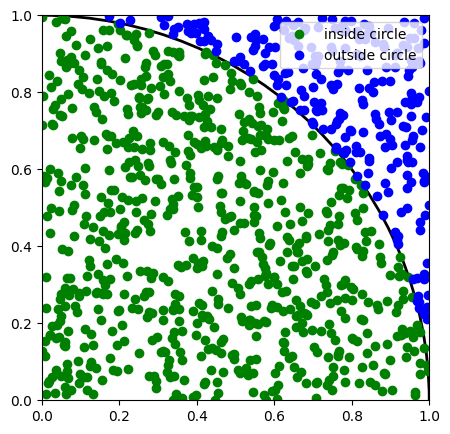

In [ ]:
inside_circle = x**2 + y**2 <= 1
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x[inside_circle],y[inside_circle],'o', color = 'green', label = 'inside circle')
ax.plot(x[~inside_circle],y[~inside_circle],'o', color = 'blue', label = 'outside circle')
circle = plt.Circle((0,0),1, color = 'black', fill = False, linewidth = 2)
ax.add_artist(circle)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.legend(loc = 'upper right')
plt.show()

In [11]:
def estimate_pi_numpy(N_T):

  x = np.random.uniform(0,1,N_T)
  y = np.random.uniform(0,1,N_T)

  N_in = np.sum(x**2 + y**2 <= 1)

  return 4*(N_in / N_T)

def estimate_py(N_T):
  N_in = 0
  for _ in range(N_T):
    x, y = random.uniform(0,1), random.uniform(0,1)
    if x**2 + y**2 <= 1:
      N_in += 1

  return 4*(N_in / N_T)

In [ ]:
problem_sizes = [10**i for i in range(1,8)]
num_trials = 5
times_numpy = []
times_py = []

for N_T in problem_sizes:
  times_numpy_trial = []
  for _ in range(num_trials):
    start_time = time.time()
    estimate_pi_numpy(N_T)
    end_time = time.time()
    times_numpy_trial.append(end_time - start_time)
  times_numpy.append(np.mean(times_numpy_trial))

  times_py_trial = []
  for _ in range(num_trials):
    start_time = time.time()
    estimate_py(N_T)
    end_time = time.time()
    times_py_trial.append(end_time - start_time)
  times_py.append(np.mean(times_py_trial))

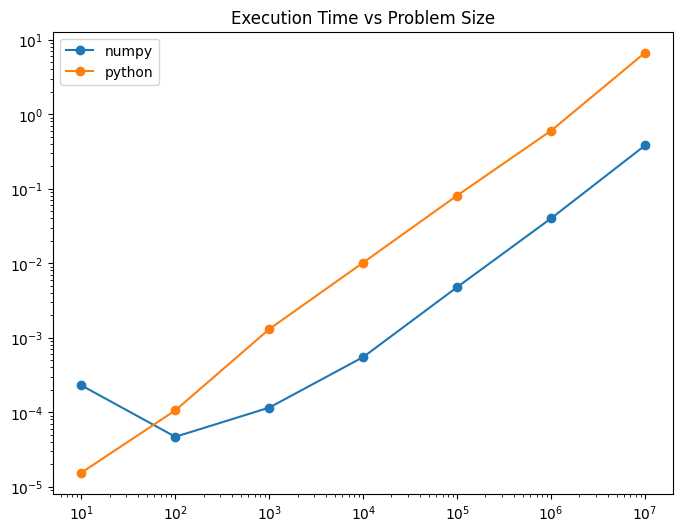

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(problem_sizes, times_numpy, marker = 'o', linestyle = '-', label = 'numpy')
plt.plot(problem_sizes, times_py, marker = 'o', linestyle = '-',label = 'python')
plt.xscale('log')
plt.yscale('log')
plt.title("Execution Time vs Problem Size")
plt.legend()
plt.show()

1.2 Introduction to Multiprocessing

* pi_serial(samples=1_000_000): This function estimates Pi using the Monte Carlo method in a sequential manner. It generates random points in a 2D space, checks whether each point falls inside the unit circle, and computes the ratio of points inside the circle to the total points. This approach is simple and effective for small sample sizes but becomes slow as the number of samples increases.
* pi_apply_async(samples=1_000_000): This function estimates Pi using multiprocessing, where each hit-miss check is computed independently by a separate worker process using apply_async(). It distributes one sample per worker, collects the results, and computes Pi in the same way as the sequential version. However, this method introduces significant communication overhead, making it inefficient for large-scale computations.
* pi_apply_async_chunked(samples=1_000_000, n_tasks=10): This function improves performance by dividing the total samples into chunks, with each worker processing multiple samples instead of a single one. It reduces the communication overhead by increasing the computation per worker, leading to better utilization of multiprocessing capabilities. This approach is more efficient and scalable, making it suitable for large-scale simulations.

In [21]:
%%writefile pi.py
import random
import multiprocessing

# Serial version
def pi_serial(samples=1_000_000):
    hits = 0
    for _ in range(samples):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x**2 + y**2 <= 1:
            hits += 1
    return 4.0 * hits / samples

# Parallel version (apply_async)
def sample():
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    return 1 if x**2 + y**2 <= 1 else 0

def pi_apply_async(samples=1_000_000):
    with multiprocessing.Pool() as pool:
        results_async = [pool.apply_async(sample) for _ in range(samples)]
        hits = sum(r.get() for r in results_async)
    return 4.0 * hits / samples

# Optimized parallel version (apply_async with chunking)
def sample_multiple(samples_partial):
    return sum(sample() for _ in range(samples_partial))

def pi_apply_async_chunked(samples=1_000_000, n_tasks=10):
    chunk_size = samples // n_tasks
    with multiprocessing.Pool() as pool:
        results_async = [pool.apply_async(sample_multiple, args=(chunk_size,)) for _ in range(n_tasks)]
        hits = sum(r.get() for r in results_async)
    return 4.0 * hits / samples

if __name__ == "__main__":
    samples = 10_000_000
    print("Pi (Serial):", pi_serial(samples))
    print("Pi (apply_async):", pi_apply_async(samples))
    print("Pi (apply_async_chunked):", pi_apply_async_chunked(samples))


Writing pi.py


Do not forget:
* User CPU Time. This is the total amount of CPU time spent executing user-level code (i.e., the Python script itself). It does not include system calls like file I/O or process scheduling.
* System CPU Time. This is the time spent by the operating system executing kernel-level operations on behalf of the program. These operations include process scheduling, memory management, and I/O handling.
* CPU Utilization Percentage. This indicates the percentage of CPU capacity used during the program’s execution.
* Elapsed "Wall Clock" Time. This is the actual real-world time taken from start to finish.

In [24]:
!time python3 -c "import pi; print('Pi (Serial):', pi.pi_serial(1_000_000))"


Pi (Serial): 3.143872
python3 -c "import pi; print('Pi (Serial):', pi.pi_serial(1_000_000))"  0.28s user 0.01s system 92% cpu 0.312 total


In [27]:
!time python3 -c "import pi; print('Pi (apply_async):', pi.pi_apply_async(1_000_000))"

Pi (apply_async): 3.142872
python3 -c   34.06s user 23.00s system 216% cpu 26.388 total


In [25]:
!time python3 -c "import pi; print('Pi (apply_async_chunked):', pi.pi_apply_async_chunked(1_000_000))"

Pi (apply_async_chunked): 3.139704
python3 -c   0.58s user 0.11s system 477% cpu 0.144 total


# Synchronization and Locks in Multiprocessing

When using multiprocessing, each process has its own independent memory. However, Python allows defining shared variables using multiprocessing.Value, enabling multiple processes to access and modify the same variable. This shared access introduces the risk of race conditions, where multiple processes read and write to the same variable simultaneously, leading to incorrect results.

To prevent race conditions, synchronization mechanisms like multiprocessing.Lock are used. A lock ensures that only one process can modify a shared resource at a time. This is crucial when multiple processes update a shared variable, such as a counter, to ensure correctness. Using locks should be minimized to avoid unnecessary performance bottlenecks.

The following example demonstrates a race condition when multiple processes increment a shared counter without synchronization.

In [29]:
%%writefile multiprocessing_race_condition.py
import multiprocessing

class CounterProcess(multiprocessing.Process):
    def __init__(self, counter):
        super().__init__()
        self.counter = counter

    def run(self):
        for _ in range(1000):
            self.counter.value += 1  # No lock, leading to race condition

def main():
    counter = multiprocessing.Value('i', 0)  # Shared integer variable
    processes = [CounterProcess(counter) for _ in range(4)]

    for p in processes:
        p.start()
    for p in processes:
        p.join()

    print("Final Counter Value (Expected: 4000):", counter.value)

if __name__ == "__main__":
    main()


Overwriting multiprocessing_race_condition.py


In [30]:
!python3 multiprocessing_race_condition.py

Final Counter Value (Expected: 4000): 1200


To fix the issue, we use a lock to ensure that only one process updates the counter at a time.

In [31]:
%%writefile multiprocessing_lock.py
import multiprocessing

class SafeCounterProcess(multiprocessing.Process):
    def __init__(self, counter, lock):
        super().__init__()
        self.counter = counter
        self.lock = lock

    def run(self):
        for _ in range(1000):
            with self.lock:  # Lock ensures exclusive access
                self.counter.value += 1

def main():
    counter = multiprocessing.Value('i', 0)  # Shared integer variable
    lock = multiprocessing.Lock()  # Lock to prevent race conditions
    processes = [SafeCounterProcess(counter, lock) for _ in range(4)]

    for p in processes:
        p.start()
    for p in processes:
        p.join()

    print("Final Counter Value (Expected: 4000):", counter.value)

if __name__ == "__main__":
    main()


Writing multiprocessing_lock.py


In [32]:
!python3 multiprocessing_lock.py


Final Counter Value (Expected: 4000): 4000
